In [9]:
from __future__ import print_function
from __future__ import division
import MySQLdb
import sys
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [10]:
pwd = """|T0<n'jM"I<,"""
db_connection = MySQLdb.connect(host="db-ro.precog.hubteam.com",
                           user="app_precog",
                           passwd=pwd)
c = db_connection.cursor()

In [11]:
query = """
SELECT * 
FROM Precog.healthScore
ORDER BY numSends DESC
"""

In [12]:
# Get data from database
try:
    c.execute(query)
    rows = c.fetchall()
except MySQLdb.Error, e:
    try:
        print("MySQL Error [%d]: %s" % (e.args[0], e.args[1]))
    except IndexError:
        print("MySQL Error: %s" % str(e))

# Use pandas to read it into a dataframe
df = pd.read_sql(query, con=db_connection)

In [13]:
# # input csv file
# top1000 = pd.read_csv('Feb2018top1000Senders.csv')

In [14]:
# Thresholds
t_openRatio = 5
t_numSends = 1000000

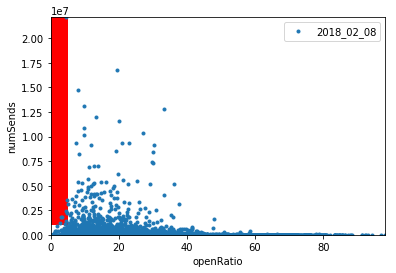

In [15]:
# openRatio as x axis and volume as y
# Top left corner are the biggest graymailers on our network
# filter out dedicated
# determine threshold to isolate only the outliers in the top left

plt.plot(df.openRatio, df.numSends, '.')
plt.xlim((0,max(df.openRatio)))
plt.ylim((0,max(df.numSends)))

plt.xlabel('openRatio')
plt.ylabel('numSends')
plt.legend(['2018_02_08'])

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, t_numSends - .5), t_openRatio, (max(df.numSends)-t_numSends), facecolor="red"))

In [18]:
# Biggest graymailers

# on shared IP's
# ix_shared = df.ip = 404

# over X sends
ix_numSends = df.numSends >= t_numSends

# open rate < X
ix_openRatio = df.openRatio <= t_openRatio

# build table
df[ix_numSends & ix_openRatio].shape
biggest_graymailers = df[ix_numSends & ix_openRatio]
biggest_graymailers.sort_values('openRatio')

,portalId,lastScoredAt,overallScore,clickThroughRatio,clickThroughScore,openRatio,openScore,unsubscribePerOpenRatio,unsubscribePerOpenScore,hardBounceRatio,hardBounceScore,numSends
200,2618643,1521766935265,15,1.894176,5.0,2.783071,1.0,9.000625,2.0,0.698862,51.0,1205389
127,374923,1521766932038,46,2.641715,7.0,3.009333,1.0,1.628995,77.5,0.022663,97.0,1800324
124,3419784,1521766936750,54,19.253729,89.0,3.238709,1.0,2.564985,47.0,0.376010,78.5,1820166
209,347944,1521766932036,33,4.949606,17.0,4.171034,1.0,2.607362,47.0,0.539592,67.0,1110654
92,4004260,1521766937261,27,1.386174,3.0,4.475237,1.0,4.618377,14.0,0.156250,89.5,2456958
0,597218,1521766933403,45,2.767062,8.0,4.545812,1.0,1.376056,81.0,0.164040,89.0,22140902
176,2056863,1521766934331,69,17.179946,86.5,4.582071,1.0,0.673630,90.5,0.002324,97.0,1377025
63,1961830,1521766933888,56,7.877760,43.0,4.882867,1.0,1.167422,83.5,0.013124,97.0,3520363
100,3012772,1521766936306,49,5.467357,20.0,4.885322,1.0,1.498901,79.5,0.066201,95.0,2197868
